# Optimizer Example
MNIST RNN example showing comparison between *newer* optimizers that appeared *after* Adam.. This is a classification problem.

Richard Henry, 26-Jul-2024 

Adapted from Keras Documentation (via Kaggle). https://www.kaggle.com/code/ankan1998/image-classification-with-recurrent-neural-network

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.17.0'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|RNN|Modern|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28,28)
batch_size = 128
num_epochs = 32

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core(mShape,mClass):
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=mShape),
            tf.keras.layers.SimpleRNN(128),
            tf.keras.layers.Dense(128,
                           activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(mClass,
                                  activation="softmax"),
        ]
    )
    return model    
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model=model_core(myShap,myClas)
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:")
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    print("\n")
    print("Evaluate Model:")
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    print("Timing:")
    return myHis

### First Model, Adam

In [7]:
%%time
h0=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7267 - loss: 0.8224 - val_accuracy: 0.9418 - val_loss: 0.1883
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9356 - loss: 0.2158 - val_accuracy: 0.9652 - val_loss: 0.1200
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9491 - loss: 0.1728 - val_accuracy: 0.9610 - val_loss: 0.1345
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9595 - loss: 0.1384 - val_accuracy: 0.9657 - val_loss: 0.1186
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9628 - loss: 0.1219 - val_accuracy: 0.9675 - val_loss: 0.1144
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9654 - loss: 0.1138 - val_accuracy: 0.9705 - val_loss: 0.1020
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9702 - loss: 0.0993 - val_accuracy: 0.9738 - val_loss: 0.0991
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9706 - 

### Second Model, Adam + Weight Decay

In [8]:
%%time
h1=model_build('adamw',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.7623 - loss: 0.7486 - val_accuracy: 0.9457 - val_loss: 0.1837
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.9332 - loss: 0.2223 - val_accuracy: 0.9483 - val_loss: 0.1740
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9495 - loss: 0.1698 - val_accuracy: 0.9527 - val_loss: 0.1633
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9586 - loss: 0.1408 - val_accuracy: 0.9698 - val_loss: 0.1059
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9637 - loss: 0.1247 - val_accuracy: 0.9633 - val_loss: 0.1292
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9673 - loss: 0.1151 - val_accuracy: 0.9753 - val_loss: 0.0921
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9697 - loss: 0.1031 - val_accuracy: 0.9705 - val_loss: 0.1050
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9709 - 

### Third Model, AdaFactor

In [9]:
%%time
h2=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 56s 44ms/step - accuracy: 0.5011 - loss: 1.5873 - val_accuracy: 0.8788 - val_loss: 0.4553
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.8519 - loss: 0.4941 - val_accuracy: 0.9203 - val_loss: 0.2740
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8956 - loss: 0.3429 - val_accuracy: 0.9385 - val_loss: 0.2116
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9167 - loss: 0.2817 - val_accuracy: 0.9458 - val_loss: 0.1786
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9279 - loss: 0.2447 - val_accuracy: 0.9510 - val_loss: 0.1626
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9329 - loss: 0.2213 - val_accuracy: 0.9563 - val_loss: 0.1455
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9391 - loss: 0.2017 - val_accuracy: 0.9588 - val_loss: 0.1377
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9440 - 

### 4th Model, LION

In [10]:
%%time
h3=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.7690 - loss: 0.7323 - val_accuracy: 0.9362 - val_loss: 0.2252
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9177 - loss: 0.3045 - val_accuracy: 0.9257 - val_loss: 0.2631
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8871 - loss: 0.4125 - val_accuracy: 0.9022 - val_loss: 0.3398
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8530 - loss: 0.5094 - val_accuracy: 0.8052 - val_loss: 0.6264
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7774 - loss: 0.7264 - val_accuracy: 0.8042 - val_loss: 0.6378
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.6451 - loss: 1.0770 - val_accuracy: 0.5978 - val_loss: 1.1710
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.4647 - loss: 1.4821 - val_accuracy: 0.3975 - val_loss: 1.5980
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4202 - 

### 5th Model, Adam with Nesterov Momentum

In [11]:
%%time
h4=model_build('nadam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 55s 41ms/step - accuracy: 0.7530 - loss: 0.7636 - val_accuracy: 0.9570 - val_loss: 0.1546
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9429 - loss: 0.1952 - val_accuracy: 0.9698 - val_loss: 0.1030
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9566 - loss: 0.1439 - val_accuracy: 0.9717 - val_loss: 0.0916
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9629 - loss: 0.1258 - val_accuracy: 0.9735 - val_loss: 0.0855
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9677 - loss: 0.1094 - val_accuracy: 0.9702 - val_loss: 0.1092
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9709 - loss: 0.0992 - val_accuracy: 0.9780 - val_loss: 0.0765
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9724 - loss: 0.0916 - val_accuracy: 0.9792 - val_loss: 0.0720
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9746 - 

### 6th Model, Follow the Regularized Leader

In [12]:
%%time
h5=model_build('ftrl',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.1143 - loss: 2.3027 - val_accuracy: 0.1050 - val_loss: 2.3024
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.1155 - loss: 2.3023 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.1155 - loss: 2.3022 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.1155 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.1155 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.1155 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.1155 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.1155 - 

### 7th Model, AdaMax

In [13]:
%%time
h6=model_build('adamax',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.7104 - loss: 0.9272 - val_accuracy: 0.9318 - val_loss: 0.2217
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9218 - loss: 0.2595 - val_accuracy: 0.9412 - val_loss: 0.1903
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9410 - loss: 0.1994 - val_accuracy: 0.9508 - val_loss: 0.1575
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9503 - loss: 0.1630 - val_accuracy: 0.9568 - val_loss: 0.1362
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9574 - loss: 0.1424 - val_accuracy: 0.9603 - val_loss: 0.1266
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9613 - loss: 0.1282 - val_accuracy: 0.9637 - val_loss: 0.1171
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9646 - loss: 0.1164 - val_accuracy: 0.9683 - val_loss: 0.1014
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9687 - 

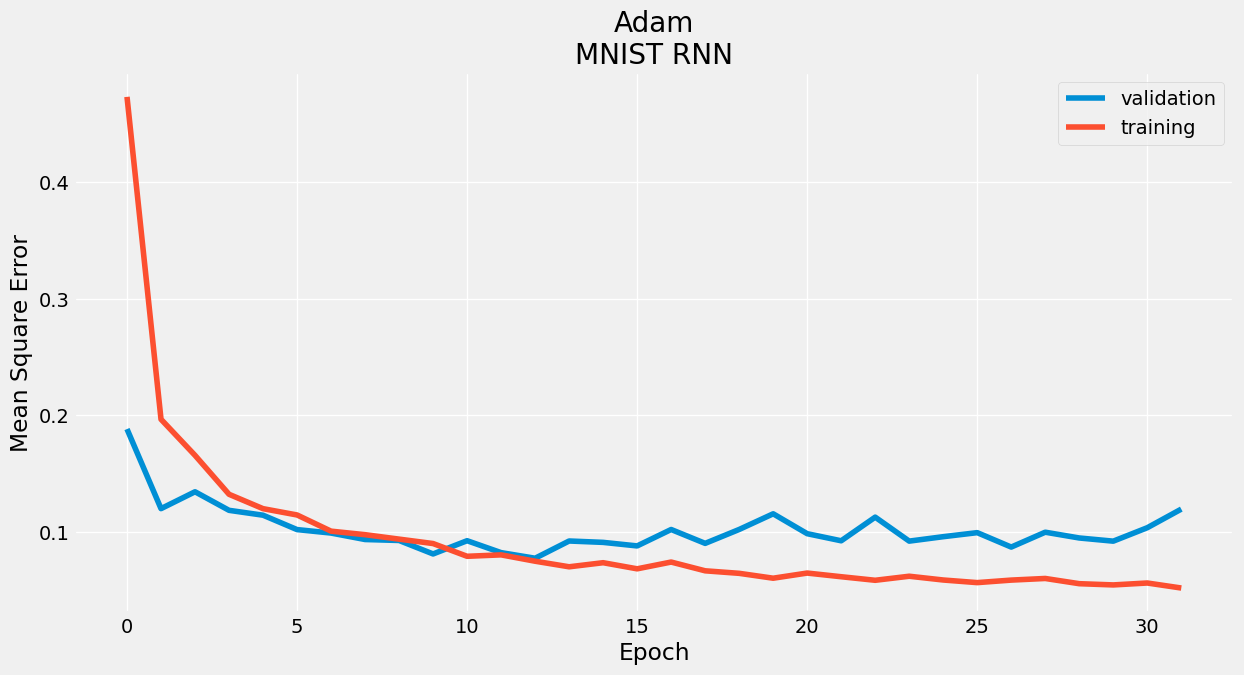

In [14]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_loss'])
plt.plot(h0.history['loss'])
plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('Adam\nMNIST RNN')
plt.grid(color='white')
plt.show()

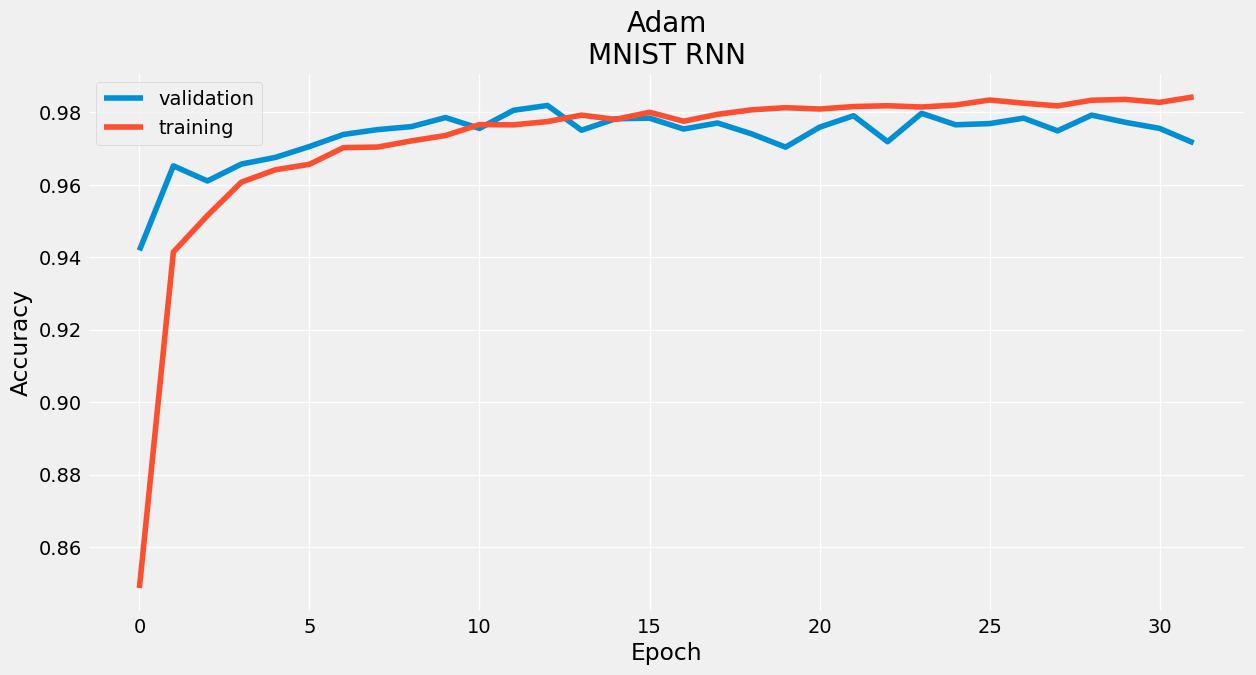

In [15]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h0.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.title('Adam\nMNIST RNN')
plt.grid(color='white')
plt.show()

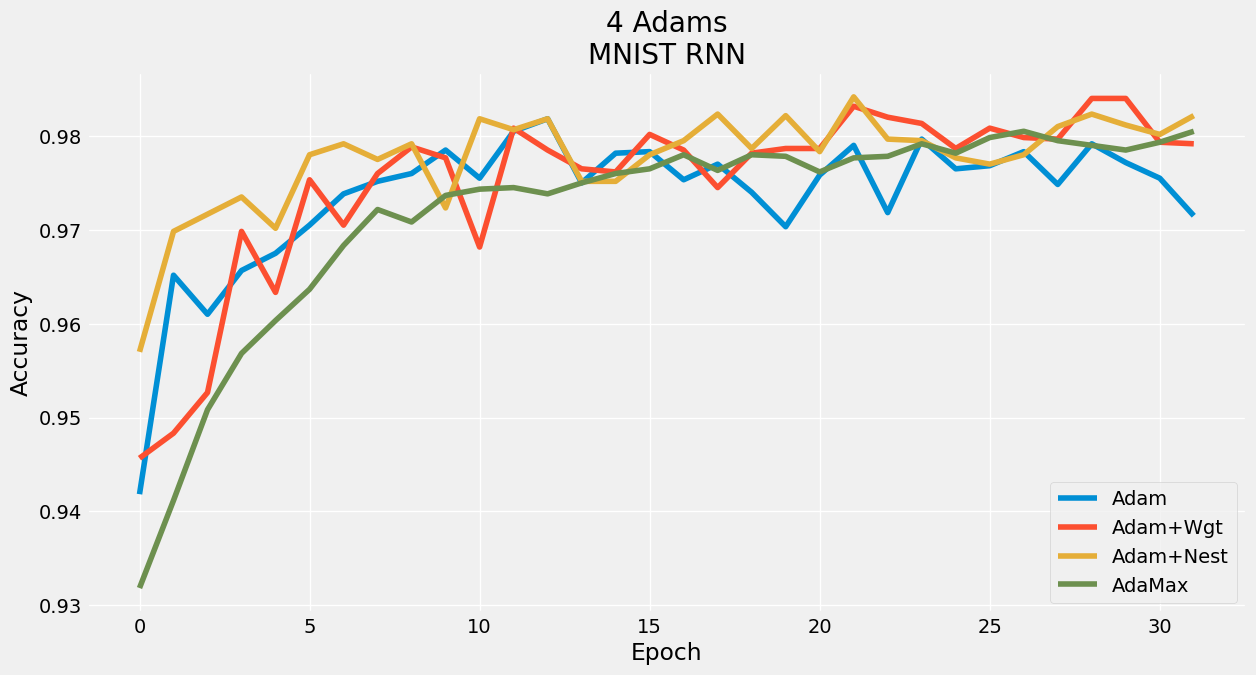

In [16]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h4.history['val_accuracy'])
plt.plot(h6.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','Adam+Wgt','Adam+Nest','AdaMax'])
plt.title('4 Adams\nMNIST RNN')
plt.grid(color='white')
plt.show()

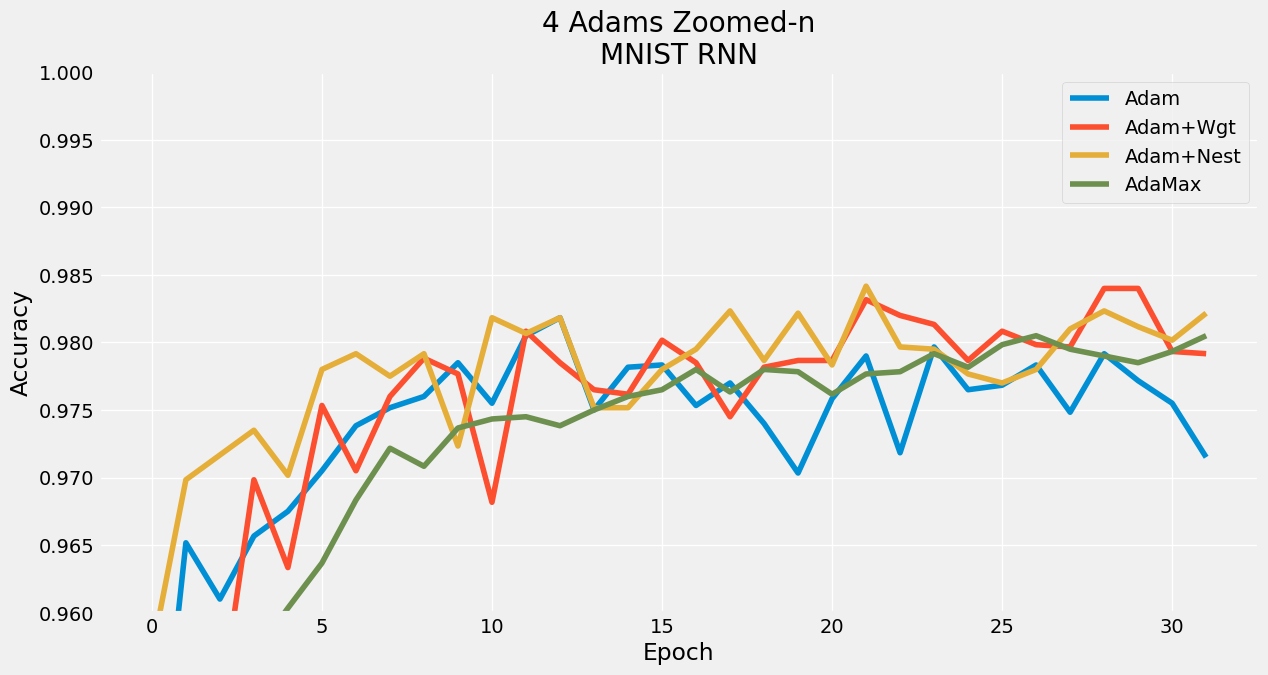

In [17]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h4.history['val_accuracy'])
plt.plot(h6.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','Adam+Wgt','Adam+Nest','AdaMax'])
plt.title('4 Adams Zoomed-n\nMNIST RNN')
plt.ylim([0.96,1.00])
plt.grid(color='white')
plt.show()

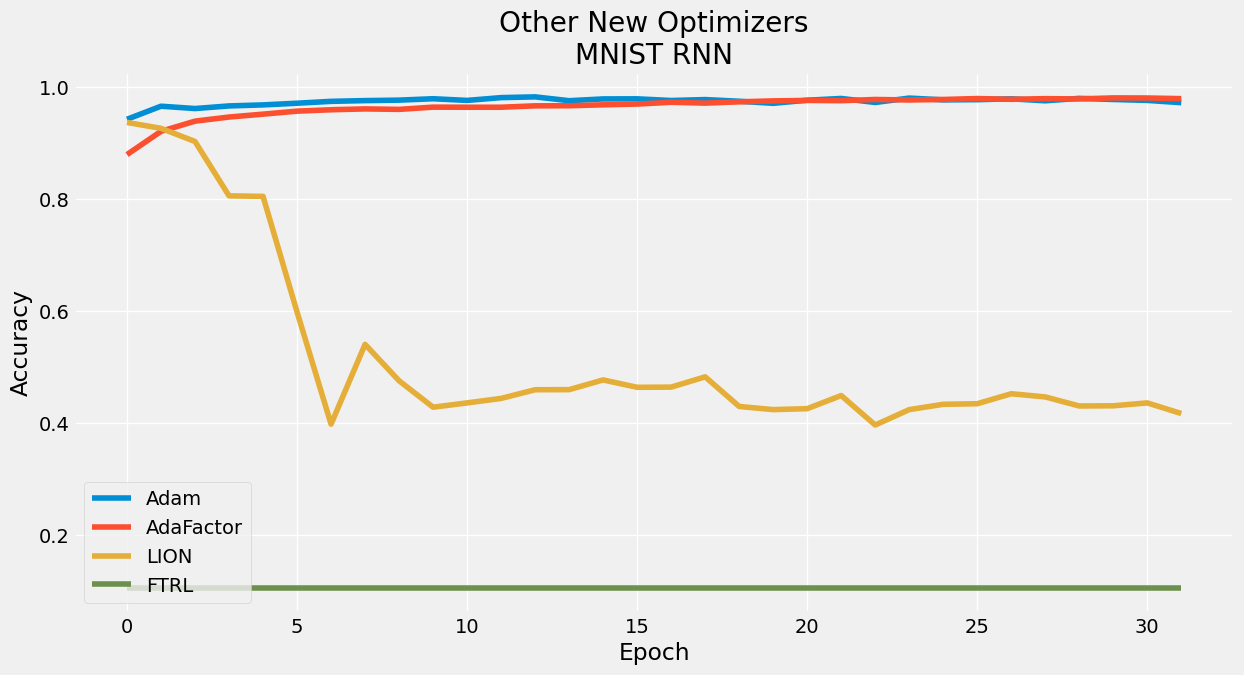

In [18]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.plot(h5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','AdaFactor','LION','FTRL'],loc='lower left')
plt.title('Other New Optimizers\nMNIST RNN')
plt.grid(color='white')
plt.show()

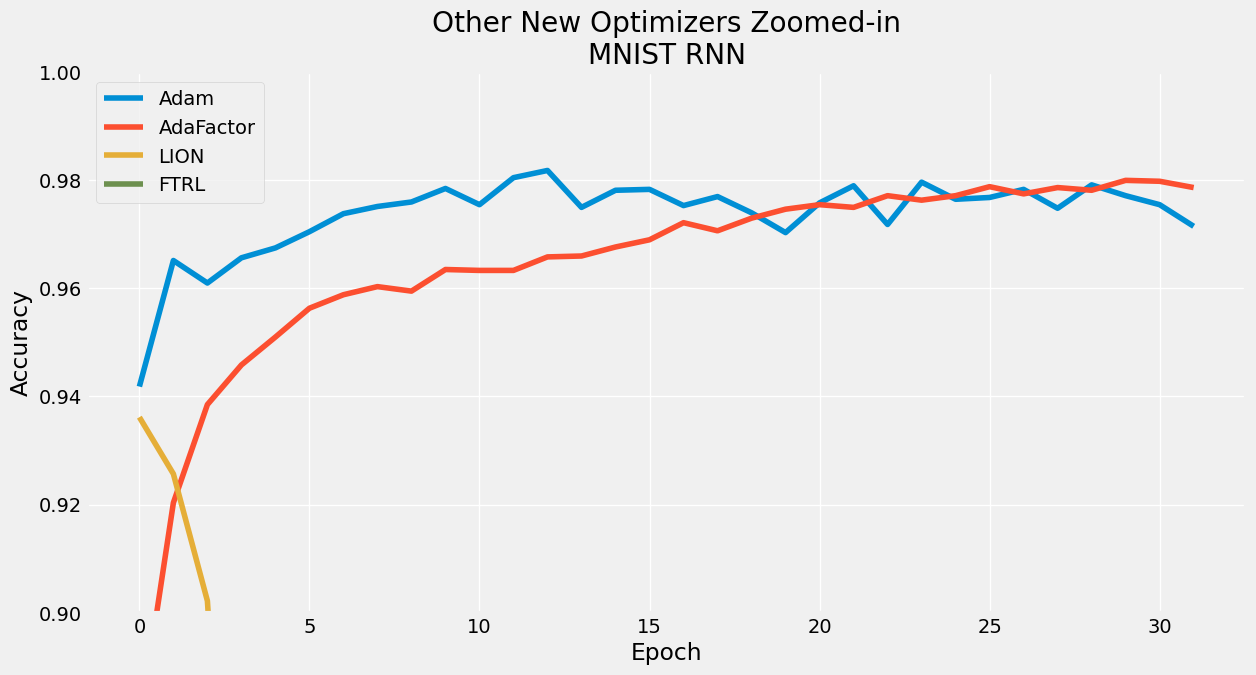

In [21]:
plt.figure(figsize=(13.33, 6.67))
plt.plot(h0.history['val_accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.plot(h5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Adam','AdaFactor','LION','FTRL'])
plt.title('Other New Optimizers Zoomed-in\nMNIST RNN')
plt.ylim([0.90,1.00])
plt.grid(color='white')
plt.show()

In [20]:
m=model_core(input_shape,num_classes)
m.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)             │ (None, 128)                 │          20,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,898 (148.04 KB)

 Trainable params: 37,898 (148.04 KB)

 Non-trainable params: 0 (0.00 B)